# Times Series

## Visualising

Let's explore the US Real GDP time series per quarter. The data can be obtained on [FRED](https://fred.stlouisfed.org/series/GDPC1).

First load the data set from the file <b>GDP.xls</b> and import libraries.

In [1]:
# Importing useful libraries and loading data set

import numpy as np
import pandas as pd 
import pandas.plotting as pp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.graphics.tsaplots as sts
import statsmodels.tsa.ar_model as arm

In [2]:
df = pd.read_excel("GDP.xls")
df

,date,GDPC
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
...,...,...
299,2021-10-01,20006.181
300,2022-01-01,19924.088
301,2022-04-01,19895.271
302,2022-07-01,20054.663


In [3]:
df["date"] = pd.to_datetime(df["date"])

Next, let's plot the graph of the time series

<function matplotlib.pyplot.show(close=None, block=None)>

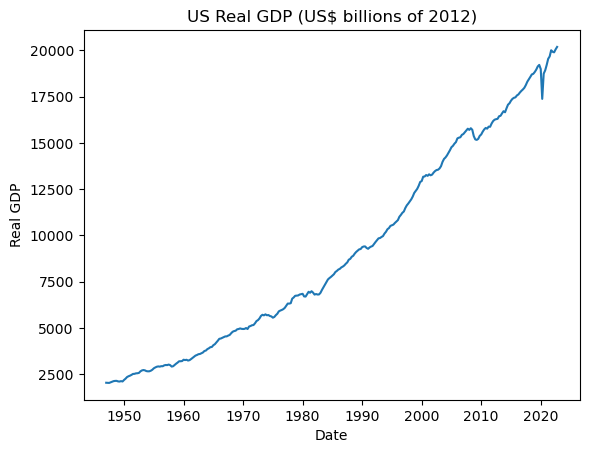

In [4]:
# Plotting the US Real GDP Series

plt.plot(df.date,df.GDPC)

title = "US Real GDP (US$ billions of 2012)"

plt.title(title)                             # Plot title
plt.xlabel("Date")                        # Plot x-axis label
plt.ylabel("Real GDP")                  # Plot y-axis label

plt.show

## First difference

Let's look at the series $Y_t$ and $Y_{t-1}$

The <b>shift</b> function from the library <b>Numpy</b> creates a lag series.

In [5]:
df

,date,GDPC
0,1947-01-01,2034.450
1,1947-04-01,2029.024
2,1947-07-01,2024.834
3,1947-10-01,2056.508
4,1948-01-01,2087.442
...,...,...
299,2021-10-01,20006.181
300,2022-01-01,19924.088
301,2022-04-01,19895.271
302,2022-07-01,20054.663


In [6]:
df.shift(1)

,date,GDPC
0,NaT,NaN
1,1947-01-01,2034.450
2,1947-04-01,2029.024
3,1947-07-01,2024.834
4,1947-10-01,2056.508
...,...,...
299,2021-07-01,19672.594
300,2021-10-01,20006.181
301,2022-01-01,19924.088
302,2022-04-01,19895.271


The first difference is 
$$ \Delta Y_t = Y_t -Y_{t-1} $$

In [7]:
# Create the first difference series

df["first_difference"] = df.GDPC - df.GDPC.shift(1)
df

,date,GDPC,first_difference
0,1947-01-01,2034.450,NaN
1,1947-04-01,2029.024,-5.426
2,1947-07-01,2024.834,-4.190
3,1947-10-01,2056.508,31.674
4,1948-01-01,2087.442,30.934
...,...,...,...
299,2021-10-01,20006.181,333.587
300,2022-01-01,19924.088,-82.093
301,2022-04-01,19895.271,-28.817
302,2022-07-01,20054.663,159.392


## Rate of growth

To calculate the rate of growth we take the first difference of the natural logarithm of the series

$$ \Delta ln(Y_t) = ln(Y_t) - ln(Y_{t-1}) $$

We can also use the following

$$ \Delta ln(Y_t) = ln(Y_t/Y_{t-1}) $$

The <b>log</b> function from the library <b>Numpy</b> calculated the natural logarithm.

In [8]:
# Create the Rate of Growth series by first difference of logs

df["growth_rate"] = np.log(df.GDPC/df.GDPC.shift(1))*100
df

,date,GDPC,first_difference,growth_rate
0,1947-01-01,2034.450,NaN,NaN
1,1947-04-01,2029.024,-5.426,-0.267062
2,1947-07-01,2024.834,-4.190,-0.206717
3,1947-10-01,2056.508,31.674,1.552168
4,1948-01-01,2087.442,30.934,1.492999
...,...,...,...,...
299,2021-10-01,20006.181,333.587,1.681478
300,2022-01-01,19924.088,-82.093,-0.411182
301,2022-04-01,19895.271,-28.817,-0.144739
302,2022-07-01,20054.663,159.392,0.797963


We can remove the NaN entries with the <b>.dropna()<b/> function

In [10]:
df = df.dropna()
df

,date,GDPC,first_difference,growth_rate
1,1947-04-01,2029.024,-5.426,-0.267062
2,1947-07-01,2024.834,-4.190,-0.206717
3,1947-10-01,2056.508,31.674,1.552168
4,1948-01-01,2087.442,30.934,1.492999
5,1948-04-01,2121.899,34.457,1.637205
...,...,...,...,...
299,2021-10-01,20006.181,333.587,1.681478
300,2022-01-01,19924.088,-82.093,-0.411182
301,2022-04-01,19895.271,-28.817,-0.144739
302,2022-07-01,20054.663,159.392,0.797963


<function matplotlib.pyplot.show(close=None, block=None)>

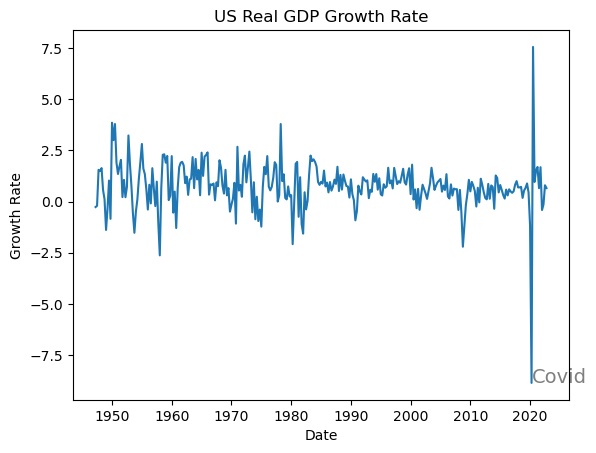

In [11]:
# Plotting the rate of growth of the US Real GDP Series

plt.plot(df.date,df.growth_rate)
plt.text(df.date[df.growth_rate==min(df.growth_rate)], df.growth_rate[df.growth_rate==min(df.growth_rate)], s="Covid", fontdict=dict(color="black", alpha=0.5, size=14))


title = "US Real GDP Growth Rate"

plt.title(title)                             # Plot title
plt.xlabel("Date")                        # Plot x-axis label
plt.ylabel("Growth Rate")                  # Plot y-axis label

plt.show

## Ljung-Box test

The Ljung-Box tests for the presence of autocorrelation.

Under the null hypothesis the lags are i.i.d. (no autocorrelation).

Research suggests that the number of lags <i>m</i> used should be $ln(T)$

In [12]:
# Ljung-box test for the US Real GDP series

T = len(df.GDPC)                                                  # T: length of the time series 
log_T = np.log(T)                                                 # ln(T): logarithm of the length of the time series
optimal_lags = round(log_T,0)                                     # round ln(T) to make it a decimal and use it as optimal lags 

sms.acorr_ljungbox(df.GDPC, lags=[optimal_lags], return_df=True)  # Ljung-Box test for Autocorrelation

,lb_stat,lb_pvalue
6,1725.526693,0.0


The p-value of the Ljung-Box statistic is 0.

The test suggests that the Real GDP series has statistically significant autocorrelation.

In [13]:
# Ljung-box test for the US Real GDP growth rate series

sms.acorr_ljungbox(df.growth_rate, lags=[optimal_lags], return_df=True)  # Ljung-Box test for Autocorrelation

,lb_stat,lb_pvalue
6,12.411846,0.053387


The p-value of the Ljung-Box statistic is 0.053387, slightly above our threshold of 5%.

The test suggests that the Real GDP growth rate series does not have statistically significant autocorrelation.

## Autoregressive models

The model uses laggee values of a variable to predict the current value.

For the GDP series, let's use a first autoregressive model AR(1).

$$ GDP_t = \phi_0 + \phi_1 GDP_{t-1} + u_t$$

First let's generate a scatterplot of the current values and the first lag to visually check for autocorrelation of lag-1.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

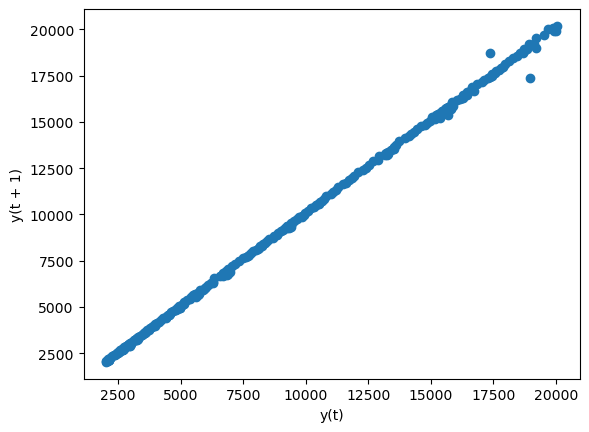

In [14]:
pp.lag_plot(df.GDPC)

In [15]:
model = arm.AutoReg(df.GDPC,lags=1).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                   GDPC   No. Observations:                  303
Model:                     AutoReg(1)   Log Likelihood               -1924.682
Method:               Conditional MLE   S.D. of innovations            141.767
Date:                Wed, 26 Mar 2025   AIC                           3855.365
Time:                        17:43:39   BIC                           3866.496
Sample:                             1   HQIC                          3859.818
                                  303                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.4688     15.929      1.662      0.097      -4.751      57.689
GDPC.L1        1.0037      0.002    667.389      0.000       1.001       1.007
                                    Roots           

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The estimated model is 

$$ \hat{GPD_t} = 26.4688 + 1.0037 \times GDP_{t-1} $$
$$ (15.929) \hspace{0.25in} (0.002) $$


The model suggests that the coefficient $\phi_1$ is statistically significant (p-value equals 0) and therefore the past value $GDP_{t-1}$ is significant in predicting $GDP_t$.

For the US Real GDP real growth rate, we have.

In [16]:
model2 = arm.AutoReg(df.growth_rate,lags=1).fit()
print(model2.summary())

                            AutoReg Model Results                             
Dep. Variable:            growth_rate   No. Observations:                  303
Model:                     AutoReg(1)   Log Likelihood                -467.480
Method:               Conditional MLE   S.D. of innovations              1.138
Date:                Wed, 26 Mar 2025   AIC                            940.960
Time:                        17:44:34   BIC                            952.091
Sample:                             1   HQIC                           945.414
                                  303                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6729      0.078      8.577      0.000       0.519       0.827
growth_rate.L1     0.1159      0.057      2.031      0.042       0.004       0.228
                                    

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


The estimated model is 

$$ \hat{GPD^{growth}_{t}} = 0.6729 + 0.1159 \times \hat{GDP^{growth}_{t-1}} $$
$$ (0.078) \hspace{0.25in} (0.057) $$


The model suggests that the coefficient $\phi_1$ is statistically significant (p-value equals 0) and therefore the past value $GDP^{growth}_{t-1}$ is significant in predicting $GPD^{growth}_{t}$.

# Information Criteria

We can use Information criteria to determine the appropriate lag <i>p</i> of an Autoregressive model.

In [17]:
print("The AIC for an AR(1) of log(GDP) is:",model2.aic)
print("The BIC for an AR(1) of log(GDP) is:",model2.bic)

The AIC for an AR(1) of log(GDP) is: 940.9599804132938
The BIC for an AR(1) of log(GDP) is: 952.0912614654184


In [18]:
model3 = arm.AutoReg(df.growth_rate,lags=2).fit()

print("The AIC for an AR(2) of log(GDP) is:",model3.aic)
print("The BIC for an AR(2) of log(GDP) is:",model3.bic)

The AIC for an AR(2) of log(GDP) is: 936.3536440147502
The BIC for an AR(2) of log(GDP) is: 951.1820850737457


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Based on the AIC and BIC, we should select 2 lags for the log(GDP) series rather than 1 lag.

## Forecasting

The estimated model one-step-ahead is

$$ \hat{GPD^{growth}_{t+1}} = 0.6729 + 0.1159 GDP^{growth}_{t} $$

The one-step-ahead forecast will be

$$ E(\hat{GPD^{growth}_{t+1}}|\Omega_{t}) = 0.6729 + 0.1159 E(GDP^{growth}_{t}|\Omega_{t})  $$

$$ E(\hat{GPD^{growth}_{t+1}}|\Omega_{t}) = 0.6729 + 0.1159 GDP^{growth}_{t}  $$

In [28]:
growth_t1 = model2.params[0] + model2.params[1]*df.growth_rate[303]
print(round(growth_t1,4))

annualized = 4*round(growth_t1,4)
print(annualized)

0.7495
2.998


The forecasted growth_rate for the US Real GDP for the fourth quarter of 2022 is 0.75% which gives an annualized rate of 3.0%.

Multi-step-ahead forecasts can be done more effectively with the <b>predict()</b> function.

The 5-step-ahead forecast is

In [20]:
start = len(df.growth_rate)
end = len(df.growth_rate) + 4

model2.predict(start=start,end=end)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


303    0.749460
304    0.759810
305    0.761010
306    0.761149
307    0.761165
dtype: float64